In [2]:
import sys

sys.path.append("../") 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc
from conformal import utils

In [2]:
# === Latex Options === #
rc('font', family='serif')
rc('text', usetex=True)

# === Matplotlib Options === #
cm = plt.cm.get_cmap('tab10')
global_plot_args = {"marker": "o",
                    "markeredgecolor": "k",
                    "markersize": 10,
                    "linewidth": 8
                    }
sns.set_context("talk", font_scale=1.3)
fig_size = (7, 7)


In [28]:
accuracies_dict = utils.load_dict_txt("metrics.txt")
accuracies_dict = {k: np.array(v) for k,v in accuracies_dict.items()}

In [29]:
accuracies_dict

{'standard': array([[0.88340563, 0.89479393, 0.92353576, 0.94685465, 0.97396964,
         0.99295008, 1.        ],
        [0.89859003, 0.9034707 , 0.91431671, 0.9300434 , 0.96908891,
         0.99186552, 1.        ],
        [0.89316702, 0.90292841, 0.914859  , 0.94143164, 0.96746206,
         0.98969632, 0.99945772]]),
 'last': array([[0.80585682, 0.74295008, 0.79338396, 0.86279827, 0.92407811,
         0.97234273, 1.        ],
        [0.80965292, 0.75704992, 0.83676791, 0.86659437, 0.92787421,
         0.97830802, 1.        ],
        [0.69956619, 0.76843816, 0.84164858, 0.87635577, 0.91973972,
         0.96691972, 0.99945772]]),
 'random': array([[0.8161605 , 0.7537961 , 0.80368763, 0.87310195, 0.92570502,
         0.97993493, 1.        ],
        [0.82483733, 0.77548808, 0.83459872, 0.87039047, 0.94522774,
         0.97993493, 1.        ],
        [0.71854663, 0.78958786, 0.85357916, 0.87201732, 0.93112797,
         0.96583515, 0.99945772]]),
 'voting': array([[0.85791755, 0.8834

<AxesSubplot:>

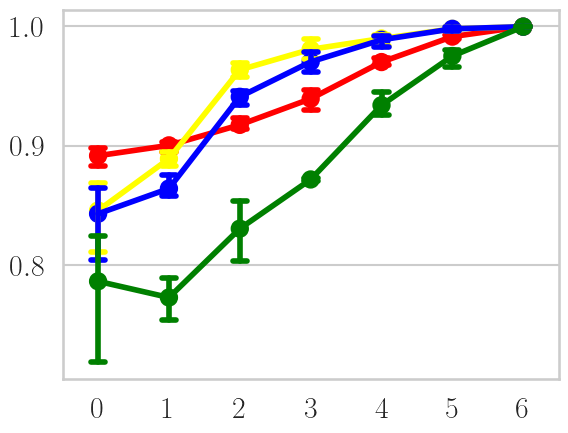

In [36]:
sns.pointplot(data=accuracies_dict["standard"], color="red",  capsize=0.2)
sns.pointplot(data=accuracies_dict["voting"], color="yellow", capsize=0.2)
sns.pointplot(data=accuracies_dict["ensemble"], color="blue", capsize=0.2)
sns.pointplot(data=accuracies_dict["random"], color="green", capsize=0.2)
